# Targets whose value difference of the label between max and min is larger than threshold

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
target_df = pd.read_csv(target_list, index_col=0)
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,model_1_ptm_seed_0_rec_10_ens_1,0.829,0.791,0.725,0.858,0.858,0.897,0.855,0.422,model_1_ptm,...,564,5WM2_A,1.548,2018-05-23T00:00:00Z,>5wm2_A mol:protein length:564 Salicylate-AMP...,MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...,564,24,10,True
1,model_1_ptm_seed_0_rec_1_ens_1,0.830,0.795,0.733,0.864,0.864,0.905,0.875,36.027,model_1_ptm,...,564,5WM2_A,1.548,2018-05-23T00:00:00Z,>5wm2_A mol:protein length:564 Salicylate-AMP...,MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...,564,24,10,True
2,model_1_ptm_seed_0_rec_2_ens_1,0.830,0.793,0.733,0.862,0.862,0.900,0.863,7.015,model_1_ptm,...,564,5WM2_A,1.548,2018-05-23T00:00:00Z,>5wm2_A mol:protein length:564 Salicylate-AMP...,MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...,564,24,10,True
3,model_1_ptm_seed_0_rec_3_ens_1,0.830,0.793,0.735,0.862,0.862,0.895,0.851,0.720,model_1_ptm,...,564,5WM2_A,1.548,2018-05-23T00:00:00Z,>5wm2_A mol:protein length:564 Salicylate-AMP...,MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...,564,24,10,True
4,model_1_ptm_seed_0_rec_4_ens_1,0.830,0.791,0.732,0.860,0.860,0.898,0.859,1.855,model_1_ptm,...,564,5WM2_A,1.548,2018-05-23T00:00:00Z,>5wm2_A mol:protein length:564 Salicylate-AMP...,MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...,564,24,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,model_5_seed_1_rec_7_ens_8,0.928,0.933,0.877,0.895,0.872,0.860,NaN,0.135,model_5,...,137,6SAN_A,1.360,2020-03-18T00:00:00Z,>6san_A mol:protein length:137 Deleted in mal...,MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...,137,4,4,False
106796,model_5_seed_1_rec_8_ens_1,0.929,0.935,0.879,0.895,0.872,0.859,NaN,0.335,model_5,...,137,6SAN_A,1.360,2020-03-18T00:00:00Z,>6san_A mol:protein length:137 Deleted in mal...,MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...,137,4,4,False
106797,model_5_seed_1_rec_8_ens_8,0.928,0.933,0.875,0.896,0.873,0.860,NaN,0.130,model_5,...,137,6SAN_A,1.360,2020-03-18T00:00:00Z,>6san_A mol:protein length:137 Deleted in mal...,MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...,137,4,4,False
106798,model_5_seed_1_rec_9_ens_1,0.928,0.933,0.879,0.896,0.873,0.861,NaN,0.435,model_5,...,137,6SAN_A,1.360,2020-03-18T00:00:00Z,>6san_A mol:protein length:137 Deleted in mal...,MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...,137,4,4,False


In [4]:
# Check target number changing threshold
label = 'GDT_TS'
thresholds = [0.05, 0.10, 0.15, 0.20]
for threshold in thresholds:
    data = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > threshold)
    print(threshold, data['Target'].unique().size)
    print(data['Target'].unique())

0.05 117
['5WM2_A' '6R9H_A' '6W1T_D' '6XIP_B' '5YVU_B' '6NIG_D' '6YV5_A' '6VYE_A'
 '6IOW_A' '7KWS_A' '6EEV_A' '6MRP_B' '6YUE_A' '6P24_C' '6M90_B' '6UY9_A'
 '6VAJ_A' '6CWW_A' '6N6R_A' '6ONF_A' '6GP1_B' '6LRC_B' '6QOK_B' '7A41_A'
 '6EFF_A' '6H5W_A' '6U6C_B' '6E7R_A' '6GF1_A' '6SX5_A' '6MGP_X' '6UUI_X'
 '6W1T_E' '6YA1_A' '7DFC_A' '6YBX_A' '6GBN_A' '5ZYK_A' '6NXK_C' '6RGV_A'
 '6Z5H_AAA' '6MFK_A' '6GVP_A' '6WN0_A' '7RNS_A' '6FBC_A' '5XWM_A' '6VJ4_A'
 '6HCW_A' '6QQ0_A' '5WHF_A' '5YUY_F' '7OKW_A' '6SC5_A' '7CQV_E' '6HOY_B'
 '5XSO_A' '6MCY_A' '6A5H_A' '5LSF_B' '6I9S_A' '6E2J_A' '6MIC_A' '6SMZ_A'
 '6AIK_A' '6Y56_A' '5Z1N_A' '6W04_A' '6V4M_A' '6VYD_A' '6XW2_A' '6LF0_A'
 '6SRN_A' '7L9R_B' '6VCI_C' '6ILS_A' '7A0M_A' '6F7D_A' '6E3A_A' '6R60_A'
 '7C4N_A' '6JTG_A' '6QTA_A' '6D8J_A' '6TME_A' '6MFU_A' '5YCA_A' '6XI1_AAA'
 '6IW6_A' '6JIE_B' '6KK9_O' '6CP8_A' '7KFF_A' '6EVU_A' '6RUM_A' '6FMB_A'
 '6HYG_A' '6JQ1_A' '6JPM_A' '7N50_A' '6BHF_A' '6HDY_A' '7COK_A' '6OD1_B'
 '6T4D_A' '6O6O_A' '6ECB_A' '6QLA_A' '

In [5]:
label = 'GDT_TS'
threshold = 0.05
fil_df = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > threshold)
print(threshold, fil_df['Target'].unique().size)
print(fil_df['Target'].unique())

0.05 117
['5WM2_A' '6R9H_A' '6W1T_D' '6XIP_B' '5YVU_B' '6NIG_D' '6YV5_A' '6VYE_A'
 '6IOW_A' '7KWS_A' '6EEV_A' '6MRP_B' '6YUE_A' '6P24_C' '6M90_B' '6UY9_A'
 '6VAJ_A' '6CWW_A' '6N6R_A' '6ONF_A' '6GP1_B' '6LRC_B' '6QOK_B' '7A41_A'
 '6EFF_A' '6H5W_A' '6U6C_B' '6E7R_A' '6GF1_A' '6SX5_A' '6MGP_X' '6UUI_X'
 '6W1T_E' '6YA1_A' '7DFC_A' '6YBX_A' '6GBN_A' '5ZYK_A' '6NXK_C' '6RGV_A'
 '6Z5H_AAA' '6MFK_A' '6GVP_A' '6WN0_A' '7RNS_A' '6FBC_A' '5XWM_A' '6VJ4_A'
 '6HCW_A' '6QQ0_A' '5WHF_A' '5YUY_F' '7OKW_A' '6SC5_A' '7CQV_E' '6HOY_B'
 '5XSO_A' '6MCY_A' '6A5H_A' '5LSF_B' '6I9S_A' '6E2J_A' '6MIC_A' '6SMZ_A'
 '6AIK_A' '6Y56_A' '5Z1N_A' '6W04_A' '6V4M_A' '6VYD_A' '6XW2_A' '6LF0_A'
 '6SRN_A' '7L9R_B' '6VCI_C' '6ILS_A' '7A0M_A' '6F7D_A' '6E3A_A' '6R60_A'
 '7C4N_A' '6JTG_A' '6QTA_A' '6D8J_A' '6TME_A' '6MFU_A' '5YCA_A' '6XI1_AAA'
 '6IW6_A' '6JIE_B' '6KK9_O' '6CP8_A' '7KFF_A' '6EVU_A' '6RUM_A' '6FMB_A'
 '6HYG_A' '6JQ1_A' '6JPM_A' '7N50_A' '6BHF_A' '6HDY_A' '7COK_A' '6OD1_B'
 '6T4D_A' '6O6O_A' '6ECB_A' '6QLA_A' '

In [6]:
diff_label = fil_df.groupby('Target').apply(lambda x: x[label].max() - x[label].min()).sort_values()
diff_label

Target
6QTA_A     0.050
6CP8_A     0.051
6U6C_B     0.051
6MCY_A     0.052
6AIK_A     0.053
            ... 
6Z5H_AAA   0.442
6XW2_A     0.453
6RGV_A     0.458
6HYG_A     0.517
6E3A_A     0.569
Length: 117, dtype: float64

<AxesSubplot:ylabel='Target'>

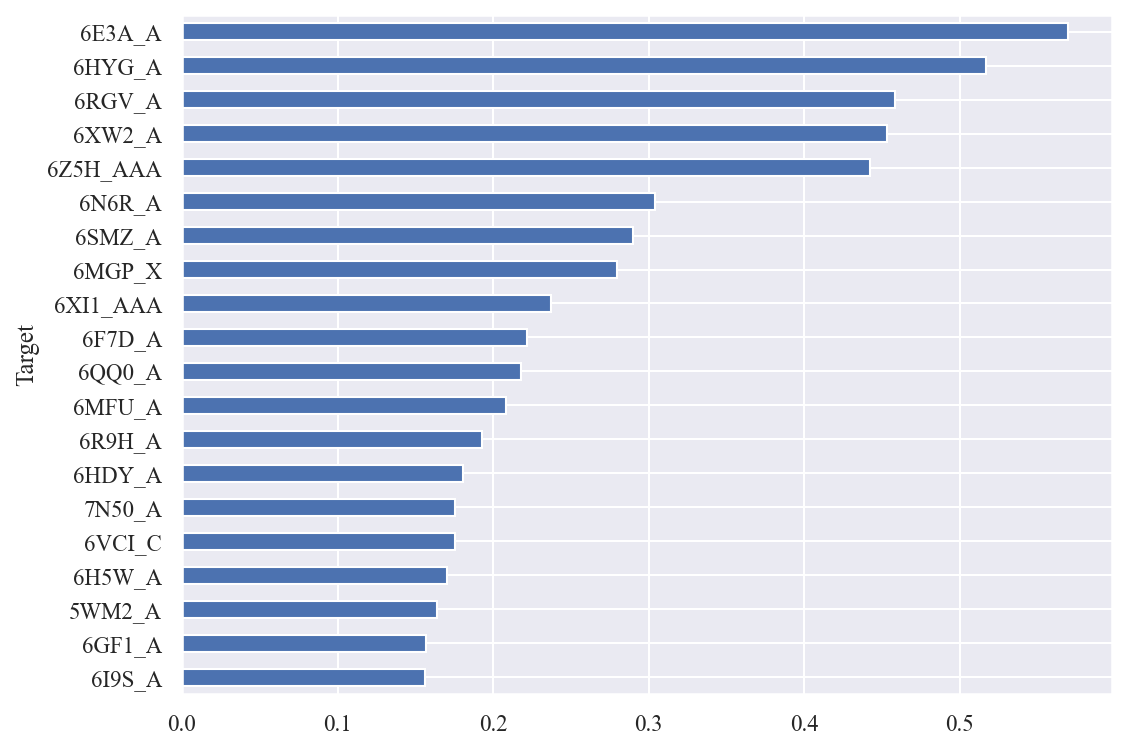

In [7]:
diff_label[-20:].plot(kind='barh', figsize=(8, 6))

In [8]:
import matplotlib.cm as cm
def boxplot_labels(df, labels, y='Target', figsize=(10, 8)):
    fig, axes = plt.subplots(nrows=1, ncols=len(labels), sharex=False, sharey=True, figsize=figsize)
    for i, label in enumerate(labels):
        sns.boxplot(data=df, y=y, x=label, ax=axes[i], color=cm.Set2(i / len(labels)))
    for i in range(1, len(axes)):
        axes[i].set_ylabel('')
    plt.tight_layout()

In [9]:
diff_label

Target
6QTA_A     0.050
6CP8_A     0.051
6U6C_B     0.051
6MCY_A     0.052
6AIK_A     0.053
            ... 
6Z5H_AAA   0.442
6XW2_A     0.453
6RGV_A     0.458
6HYG_A     0.517
6E3A_A     0.569
Length: 117, dtype: float64

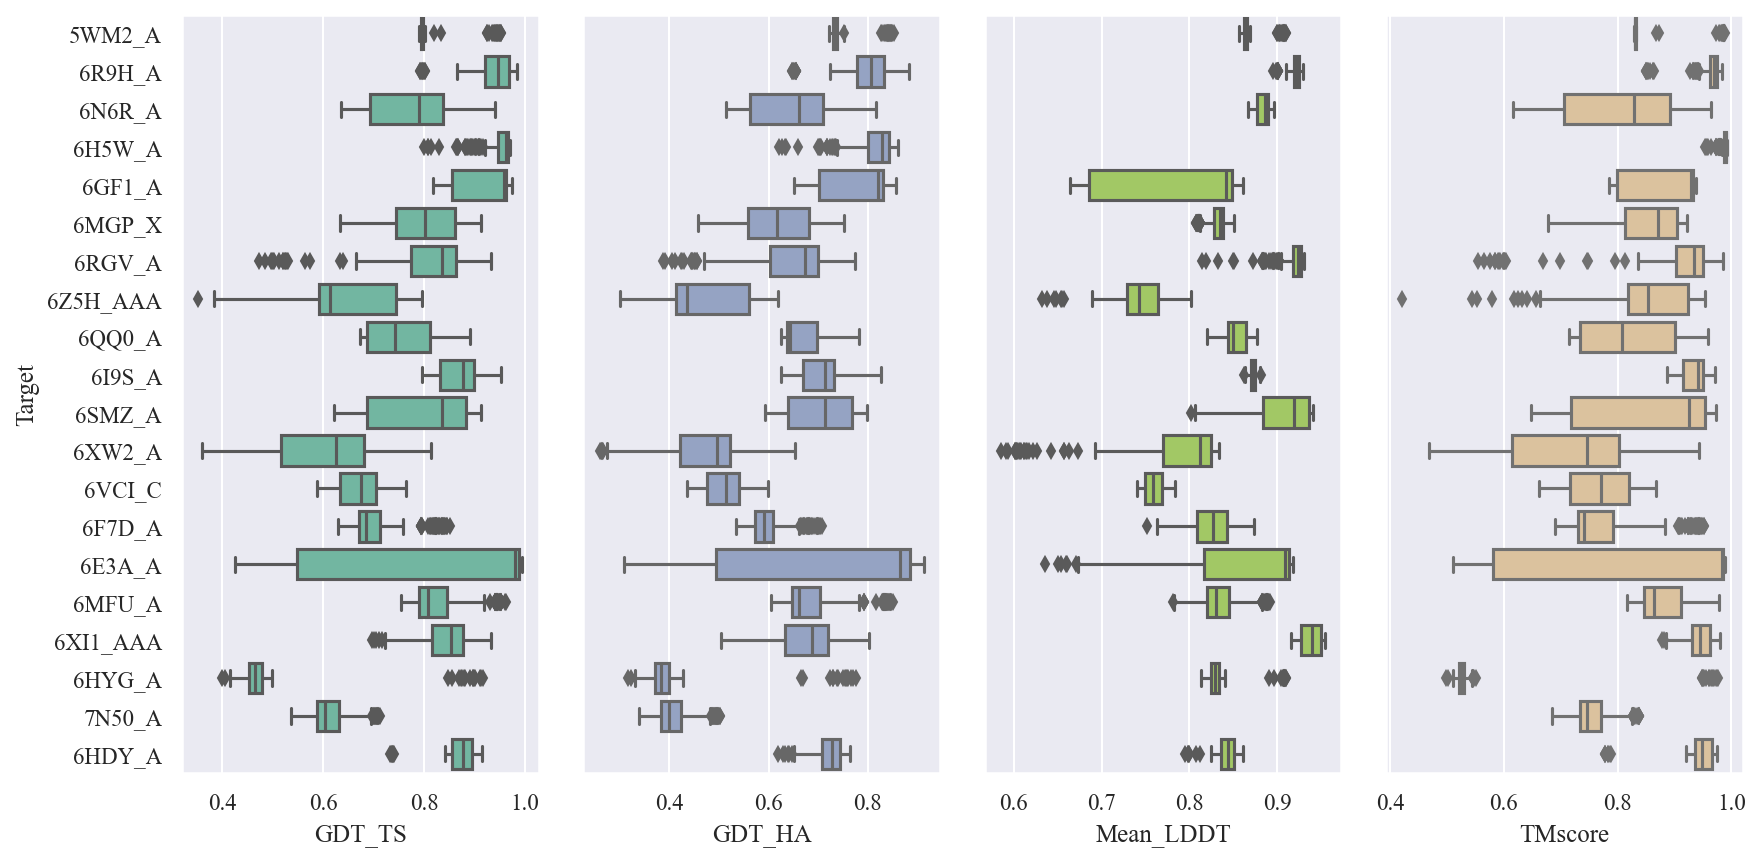

In [10]:
labels = ['GDT_TS', 'GDT_HA', 'Mean_LDDT', 'TMscore']
target_num = 20
targets = diff_label[-target_num:].index
boxplot_labels(fil_df.query('Target in @targets'), labels, figsize=(12, 6))

In [11]:
def scatter(df, x, y, col_wrap=4, lim=(0.7, 1)):
    g = sns.relplot(data=df, kind='scatter', x=x, y=y, col='Target', col_wrap=col_wrap)
    g.set(xlim=lim, ylim=lim)
    plt.subplots_adjust(wspace=0.1)
label = 'GDT_TS'
score = 'pLDDT'
scatter(fil_df, x=score, y=label, lim=(0.3, 1.0), col_wrap=5)